## This script reads CESM2 data for Discharge downloaded from Casper in NCAR (Fig 9)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime

import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [2]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
#file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [3]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

## Using Monthly Data (Historical + Scen) for the US domain prepared from "GLADE" 

In [4]:
file_histSel_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMembers.npy'
file_histSel_Us_ensMem_loaded = np.load(file_histSel_Us_ensMem)
print(file_histSel_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMem_loaded)
maxVal

(1020, 60, 140, 50)


1e+36

In [5]:
file_histSel_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMean.npy'
file_histSel_Us_ensMean_loaded = np.load(file_histSel_Us_ensMean)
print(file_histSel_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMean_loaded)
maxVal

(1020, 60, 140)


1.0000000000000002e+36

In [6]:
file_scen_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMems.npy'
file_scen_Us_ensMem_loaded = np.load(file_scen_Us_ensMem)
print(file_scen_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMem_loaded)
maxVal

(1032, 60, 140, 50)


1e+36

In [7]:
file_scen_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMean.npy'
file_scen_Us_ensMean_loaded = np.load(file_scen_Us_ensMean)
print(file_scen_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMean_loaded)
maxVal

(1032, 60, 140)


1.0000000000000002e+36

## Concatenate two data arrays

In [8]:
disch_histSel_scen_Us_ensMean = np.concatenate((file_histSel_Us_ensMean_loaded, file_scen_Us_ensMean_loaded), axis=0)
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


In [9]:
t_histSel_scen,y_US,x_US = disch_histSel_scen_Us_ensMean.shape
print(t_histSel_scen)

2052


### Coordinates at the outlet of the basins

### Coordinates

In [10]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [11]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)


# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


In [12]:
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


In [13]:
Month_steps = [x for x in range(t_histSel_scen)]

## For Seasonal Values

In [14]:
def Season(value):
    if value <= 2:
        return "Winter"
    if 3 <= value <= 5:
        return "Spring"
    elif 6 <= value <= 8:
        return "Summer"
    elif 9 <= value <= 11:
        return "Fall"
    elif value == 12:
        return "Winter"

In [15]:
dates_histSelScen = xr.cftime_range(start='193001',freq='1M', periods=2052, calendar='noleap').strftime('%Y-%m').to_list()
print(dates_histSelScen[:3], dates_histSelScen[-1])


['1930-01', '1930-02', '1930-03'] 2100-12


## Extracting discharge values and calculate seasonal values at different outlet points

### Missouri at Hermann

In [16]:

disch_histSel_scen_ensMean_missouriHermann = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann]
print(disch_histSel_scen_ensMean_missouriHermann.shape)
#disch_histSel_scen_ensMean_missouriHermann = np.nanmean(disch_histSel_scen_ensMems_missouriHermann, axis =1)
#print(disch_histSel_scen_ensMean_missouriHermann.shape[0])


disch_histSel_Scen_ensMean_missouriHermann_xarray = xr.DataArray(disch_histSel_scen_ensMean_missouriHermann, coords=[Month_steps], dims=["Month_steps"])
print(disch_histSel_Scen_ensMean_missouriHermann_xarray.shape)
print(disch_histSel_Scen_ensMean_missouriHermann_xarray)

#df['Day_steps'] = dates_histSelScen
disch_histSel_Scen_ensMean_missouriHermann_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(disch_histSel_Scen_ensMean_missouriHermann_xarray.shape)
print(disch_histSel_Scen_ensMean_missouriHermann_xarray.head(3))

df_disch_missouriHermann = disch_histSel_Scen_ensMean_missouriHermann_xarray.to_dataframe(name='Discharge').reset_index()
print(df_disch_missouriHermann.shape)
print(df_disch_missouriHermann.head(3))

df_disch_missouriHermann['Season_year'] = df_disch_missouriHermann.Month_steps.dt.year.where(df_disch_missouriHermann.Month_steps.dt.month < 12, df_disch_missouriHermann.Month_steps.dt.year + 1)
print(df_disch_missouriHermann.shape)
print(df_disch_missouriHermann.head(15))

df_disch_missouriHermann['Season_mon'] = df_disch_missouriHermann.Month_steps.dt.month.where(df_disch_missouriHermann.Month_steps.dt.month == 1, df_disch_missouriHermann.Month_steps.dt.month)
print(df_disch_missouriHermann.shape)
print(df_disch_missouriHermann.head(15))



df_disch_missouriHermann['Season'] = df_disch_missouriHermann['Season_mon'].map(Season)
print(df_disch_missouriHermann.shape)
print(df_disch_missouriHermann.head(15))

df_disch_winter_missouriHermann_withOneExtra = df_disch_missouriHermann[df_disch_missouriHermann["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_disch_winter_missouriHermann_withOneExtra.shape)
print(df_disch_winter_missouriHermann_withOneExtra)

## to Delete the last (unwanted) row
df_disch_winter_missouriHermann = df_disch_winter_missouriHermann_withOneExtra.iloc[:-1 , :]
print(df_disch_winter_missouriHermann.shape)
print(df_disch_winter_missouriHermann.tail())

df_disch_spring_missouriHermann = df_disch_missouriHermann[df_disch_missouriHermann["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_disch_spring_missouriHermann.shape)
print(df_disch_spring_missouriHermann)

df_disch_summer_missouriHermann = df_disch_missouriHermann[df_disch_missouriHermann["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_disch_summer_missouriHermann.shape)
print(df_disch_summer_missouriHermann)

df_disch_fall_missouriHermann = df_disch_missouriHermann[df_disch_missouriHermann["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_disch_fall_missouriHermann.shape)
print(df_disch_fall_missouriHermann)

disch_winter_missouriHermann = df_disch_winter_missouriHermann['Discharge']
print(disch_winter_missouriHermann.shape)
print(disch_winter_missouriHermann)

disch_spring_missouriHermann = df_disch_spring_missouriHermann['Discharge']
print(disch_spring_missouriHermann.shape)
print(disch_spring_missouriHermann)

disch_summer_missouriHermann = df_disch_summer_missouriHermann['Discharge']
print(disch_summer_missouriHermann.shape)
print(disch_summer_missouriHermann)

disch_fall_missouriHermann = df_disch_fall_missouriHermann['Discharge']
print(disch_fall_missouriHermann.shape)
print(disch_fall_missouriHermann)


(2052,)
(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([2991.593548  , 3130.61377028, 4039.18189897, ..., 3995.38160084,
       3706.91341876, 3540.47420775])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([2991.593548  , 3130.61377028, 4039.18189897])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps    Discharge
0  1930-01-01  2991.593548
1  1930-02-01  3130.613770
2  1930-03-01  4039.181899
(2052, 3)
   Month_steps    Discharge  Season_year
0   1930-01-01  2991.593548         1930
1   1930-02-01  3130.613770         1930
2   1930-03-01  4039.181899         1930
3   1930-04-01  7152.312034         1930
4   1930-05-01  8323.728833         1930
5   1930-06-01  6224.841235         1930
6   1930-07-01  5609.087629         1930
7   1930-08-01  4204.376030         1930
8   1930-09-01  4238.929846         1930
9   1930-10-01  4

## Arkansas at Murray Little Rock

In [17]:
disch_histSel_scen_ensMean_arkansasMurrayLittleRock = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock]
print(disch_histSel_scen_ensMean_arkansasMurrayLittleRock.shape)

#disch_histSel_scen_ensMean_arkansasMurrayLittleRock = np.nanmean(disch_histSel_scen_ensMems_arkansasMurrayLittleRock, axis =1)
#print(disch_histSel_scen_ensMean_arkansasMurrayLittleRock.shape[0])

disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray = xr.DataArray(disch_histSel_scen_ensMean_arkansasMurrayLittleRock, coords=[Month_steps], dims=["Month_steps"])
print(disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray.shape)
print(disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray)

#df['Day_steps'] = dates_histSelScen
disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray.shape)
print(disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_disch_arkansasMurrayLittleRock = disch_histSel_Scen_ensMean_arkansasMurrayLittleRock_xarray.to_dataframe(name='Discharge').reset_index()
print(df_disch_arkansasMurrayLittleRock.shape)
print(df_disch_arkansasMurrayLittleRock.head(3))

df_disch_arkansasMurrayLittleRock['Season_year'] = df_disch_arkansasMurrayLittleRock.Month_steps.dt.year.where(df_disch_arkansasMurrayLittleRock.Month_steps.dt.month < 12, df_disch_arkansasMurrayLittleRock.Month_steps.dt.year + 1)
print(df_disch_arkansasMurrayLittleRock.shape)
print(df_disch_arkansasMurrayLittleRock.head(15))

df_disch_arkansasMurrayLittleRock['Season_mon'] = df_disch_arkansasMurrayLittleRock.Month_steps.dt.month.where(df_disch_arkansasMurrayLittleRock.Month_steps.dt.month == 1, df_disch_arkansasMurrayLittleRock.Month_steps.dt.month)
print(df_disch_arkansasMurrayLittleRock.shape)
print(df_disch_arkansasMurrayLittleRock.head(15))


df_disch_arkansasMurrayLittleRock['Season'] = df_disch_arkansasMurrayLittleRock['Season_mon'].map(Season)
#display(df_disch_arkansasMurrayLittleRock.head())
print(df_disch_arkansasMurrayLittleRock.shape)
print(df_disch_arkansasMurrayLittleRock.head(15))
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

df_disch_winter_arkansasMurrayLittleRock_withOneExtra = df_disch_arkansasMurrayLittleRock[df_disch_arkansasMurrayLittleRock["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_disch_winter_arkansasMurrayLittleRock_withOneExtra.shape)
print(df_disch_winter_arkansasMurrayLittleRock_withOneExtra)

## to Delete the last (unwanted) row
df_disch_winter_arkansasMurrayLittleRock = df_disch_winter_arkansasMurrayLittleRock_withOneExtra.iloc[:-1 , :]
print(df_disch_winter_arkansasMurrayLittleRock.shape)
print(df_disch_winter_arkansasMurrayLittleRock.tail())

df_disch_spring_arkansasMurrayLittleRock = df_disch_arkansasMurrayLittleRock[df_disch_arkansasMurrayLittleRock["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_disch_spring_arkansasMurrayLittleRock.shape)
print(df_disch_spring_arkansasMurrayLittleRock)

df_disch_summer_arkansasMurrayLittleRock = df_disch_arkansasMurrayLittleRock[df_disch_arkansasMurrayLittleRock["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_disch_summer_arkansasMurrayLittleRock.shape)
print(df_disch_summer_arkansasMurrayLittleRock)

df_disch_fall_arkansasMurrayLittleRock = df_disch_arkansasMurrayLittleRock[df_disch_arkansasMurrayLittleRock["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_disch_fall_arkansasMurrayLittleRock.shape)
print(df_disch_fall_arkansasMurrayLittleRock)

disch_winter_arkansasMurrayLittleRock = df_disch_winter_arkansasMurrayLittleRock['Discharge']
print(disch_winter_arkansasMurrayLittleRock.shape)
print(disch_winter_arkansasMurrayLittleRock)

disch_spring_arkansasMurrayLittleRock = df_disch_spring_arkansasMurrayLittleRock['Discharge']
print(disch_spring_arkansasMurrayLittleRock.shape)
print(disch_spring_arkansasMurrayLittleRock)

disch_summer_arkansasMurrayLittleRock = df_disch_summer_arkansasMurrayLittleRock['Discharge']
print(disch_summer_arkansasMurrayLittleRock.shape)
print(disch_summer_arkansasMurrayLittleRock)

disch_fall_arkansasMurrayLittleRock = df_disch_fall_arkansasMurrayLittleRock['Discharge']
print(disch_fall_arkansasMurrayLittleRock.shape)
print(disch_fall_arkansasMurrayLittleRock)



(2052,)
(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([1643.14028677, 2084.78942639, 2289.55509336, ..., 1431.84248781,
       1272.10001598, 1361.00757682])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([1643.14028677, 2084.78942639, 2289.55509336])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps    Discharge
0  1930-01-01  1643.140287
1  1930-02-01  2084.789426
2  1930-03-01  2289.555093
(2052, 3)
   Month_steps    Discharge  Season_year
0   1930-01-01  1643.140287         1930
1   1930-02-01  2084.789426         1930
2   1930-03-01  2289.555093         1930
3   1930-04-01  2672.202353         1930
4   1930-05-01  2724.646254         1930
5   1930-06-01  2557.828745         1930
6   1930-07-01  1880.591428         1930
7   1930-08-01  1430.171439         1930
8   1930-09-01  1557.703168         1930
9   1930-10-01  1

# Ohio at Olmsted

In [18]:
disch_histSel_scen_ensMean_ohioOlmsted = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted]
print(disch_histSel_scen_ensMean_ohioOlmsted.shape)

#disch_histSel_scen_ensMean_ohioOlmsted = np.nanmean(disch_histSel_scen_ensMems_ohioOlmsted, axis =1)
#print(disch_histSel_scen_ensMean_ohioOlmsted.shape[0])

disch_histSel_Scen_ensMean_ohioOlmsted_xarray = xr.DataArray(disch_histSel_scen_ensMean_ohioOlmsted, coords=[Month_steps], dims=["Month_steps"])
print(disch_histSel_Scen_ensMean_ohioOlmsted_xarray.shape)
print(disch_histSel_Scen_ensMean_ohioOlmsted_xarray)

#df['Day_steps'] = dates_histSelScen
disch_histSel_Scen_ensMean_ohioOlmsted_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(disch_histSel_Scen_ensMean_ohioOlmsted_xarray.shape)
print(disch_histSel_Scen_ensMean_ohioOlmsted_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_disch_ohioOlmsted = disch_histSel_Scen_ensMean_ohioOlmsted_xarray.to_dataframe(name='Discharge').reset_index()
print(df_disch_ohioOlmsted.shape)
print(df_disch_ohioOlmsted.head(3))

df_disch_ohioOlmsted['Season_year'] = df_disch_ohioOlmsted.Month_steps.dt.year.where(df_disch_ohioOlmsted.Month_steps.dt.month < 12, df_disch_ohioOlmsted.Month_steps.dt.year + 1)
print(df_disch_ohioOlmsted.shape)
print(df_disch_ohioOlmsted.head(15))

df_disch_ohioOlmsted['Season_mon'] = df_disch_ohioOlmsted.Month_steps.dt.month.where(df_disch_ohioOlmsted.Month_steps.dt.month == 1, df_disch_ohioOlmsted.Month_steps.dt.month)
print(df_disch_ohioOlmsted.shape)
print(df_disch_ohioOlmsted.head(15))


df_disch_ohioOlmsted['Season'] = df_disch_ohioOlmsted['Season_mon'].map(Season)
#display(df_disch_ohioOlmsted.head())
print(df_disch_ohioOlmsted.shape)
print(df_disch_ohioOlmsted.head(15))
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

df_disch_winter_ohioOlmsted_withOneExtra = df_disch_ohioOlmsted[df_disch_ohioOlmsted["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_disch_winter_ohioOlmsted_withOneExtra.shape)
print(df_disch_winter_ohioOlmsted_withOneExtra)

## to Delete the last (unwanted) row
df_disch_winter_ohioOlmsted = df_disch_winter_ohioOlmsted_withOneExtra.iloc[:-1 , :]
print(df_disch_winter_ohioOlmsted.shape)
print(df_disch_winter_ohioOlmsted.tail())

df_disch_spring_ohioOlmsted = df_disch_ohioOlmsted[df_disch_ohioOlmsted["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_disch_spring_ohioOlmsted.shape)
print(df_disch_spring_ohioOlmsted)

df_disch_summer_ohioOlmsted = df_disch_ohioOlmsted[df_disch_ohioOlmsted["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_disch_summer_ohioOlmsted.shape)
print(df_disch_summer_ohioOlmsted)

df_disch_fall_ohioOlmsted = df_disch_ohioOlmsted[df_disch_ohioOlmsted["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_disch_fall_ohioOlmsted.shape)
print(df_disch_fall_ohioOlmsted)

disch_winter_ohioOlmsted = df_disch_winter_ohioOlmsted['Discharge']
print(disch_winter_ohioOlmsted.shape)
print(disch_winter_ohioOlmsted)

disch_spring_ohioOlmsted = df_disch_spring_ohioOlmsted['Discharge']
print(disch_spring_ohioOlmsted.shape)
print(disch_spring_ohioOlmsted)

disch_summer_ohioOlmsted = df_disch_summer_ohioOlmsted['Discharge']
print(disch_summer_ohioOlmsted.shape)
print(disch_summer_ohioOlmsted)

disch_fall_ohioOlmsted = df_disch_fall_ohioOlmsted['Discharge']
print(disch_fall_ohioOlmsted.shape)
print(disch_fall_ohioOlmsted)


(2052,)
(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([5689.85242951, 6037.97558555, 8019.05102153, ..., 8021.67416435,
       7565.05483451, 7229.43068196])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([5689.85242951, 6037.97558555, 8019.05102153])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps    Discharge
0  1930-01-01  5689.852430
1  1930-02-01  6037.975586
2  1930-03-01  8019.051022
(2052, 3)
   Month_steps     Discharge  Season_year
0   1930-01-01   5689.852430         1930
1   1930-02-01   6037.975586         1930
2   1930-03-01   8019.051022         1930
3   1930-04-01  13827.641469         1930
4   1930-05-01  12867.873198         1930
5   1930-06-01  10018.201155         1930
6   1930-07-01   9557.658457         1930
7   1930-08-01   7841.976487         1930
8   1930-09-01   7837.215478         1930
9   193

## Mississippi at Vicksburg

In [19]:
disch_histSel_scen_ensMean_missiVicks = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks]
print(disch_histSel_scen_ensMean_missiVicks.shape)

t_histSel_scen = disch_histSel_scen_ensMean_missiVicks.shape[0]
print(t_histSel_scen)

Month_steps = [x for x in range(t_histSel_scen)]
disch_histSel_Scen_ensMean_missiVicks_xarray = xr.DataArray(disch_histSel_scen_ensMean_missiVicks, coords=[Month_steps], dims=["Month_steps"])
print(disch_histSel_Scen_ensMean_missiVicks_xarray.shape)
print(disch_histSel_Scen_ensMean_missiVicks_xarray)

disch_histSel_Scen_ensMean_missiVicks_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(disch_histSel_Scen_ensMean_missiVicks_xarray.shape)
print(disch_histSel_Scen_ensMean_missiVicks_xarray.head(3))

df_disch_missiVicks = disch_histSel_Scen_ensMean_missiVicks_xarray.to_dataframe(name='Discharge').reset_index()

print(df_disch_missiVicks.shape)
print(df_disch_missiVicks.head(3))

df_disch_missiVicks['Season_year'] = df_disch_missiVicks.Month_steps.dt.year.where(df_disch_missiVicks.Month_steps.dt.month < 12, df_disch_missiVicks.Month_steps.dt.year + 1)
print(df_disch_missiVicks.shape)
print(df_disch_missiVicks.head(15))
df_disch_missiVicks['Season_mon'] = df_disch_missiVicks.Month_steps.dt.month.where(df_disch_missiVicks.Month_steps.dt.month == 1, df_disch_missiVicks.Month_steps.dt.month)
print(df_disch_missiVicks.shape)
print(df_disch_missiVicks.head(15))

df_disch_missiVicks['Season'] = df_disch_missiVicks['Season_mon'].map(Season)
#display(df_disch_missiVicks.head())
print(df_disch_missiVicks.shape)
print(df_disch_missiVicks.head(15))

df_disch_winter_missiVicks_withOneExtra = df_disch_missiVicks[df_disch_missiVicks["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_disch_winter_missiVicks_withOneExtra.shape)
print(df_disch_winter_missiVicks_withOneExtra)
## to Delete the last (unwanted) row
df_disch_winter_missiVicks = df_disch_winter_missiVicks_withOneExtra.iloc[:-1 , :]
print(df_disch_winter_missiVicks.shape)
print(df_disch_winter_missiVicks.tail())

df_disch_spring_missiVicks = df_disch_missiVicks[df_disch_missiVicks["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_disch_spring_missiVicks.shape)
print(df_disch_spring_missiVicks)

df_disch_summer_missiVicks = df_disch_missiVicks[df_disch_missiVicks["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_disch_summer_missiVicks.shape)
print(df_disch_summer_missiVicks)

df_disch_fall_missiVicks = df_disch_missiVicks[df_disch_missiVicks["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_disch_fall_missiVicks.shape)
print(df_disch_fall_missiVicks)

disch_winter_missiVicks = df_disch_winter_missiVicks['Discharge']
print(disch_winter_missiVicks.shape)
print(disch_winter_missiVicks)

disch_spring_missiVicks = df_disch_spring_missiVicks['Discharge']
print(disch_spring_missiVicks.shape)
print(disch_spring_missiVicks)

disch_summer_missiVicks = df_disch_summer_missiVicks['Discharge']
print(disch_summer_missiVicks.shape)
print(disch_summer_missiVicks)

disch_fall_missiVicks = df_disch_fall_missiVicks['Discharge']
print(disch_fall_missiVicks.shape)
print(disch_fall_missiVicks)



(2052,)
2052
(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([19864.34282134, 23991.7368149 , 27771.8696204 , ...,
       18609.70941279, 18018.92344794, 22071.80326254])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([19864.34282134, 23991.7368149 , 27771.8696204 ])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps     Discharge
0  1930-01-01  19864.342821
1  1930-02-01  23991.736815
2  1930-03-01  27771.869620
(2052, 3)
   Month_steps     Discharge  Season_year
0   1930-01-01  19864.342821         1930
1   1930-02-01  23991.736815         1930
2   1930-03-01  27771.869620         1930
3   1930-04-01  36859.810524         1930
4   1930-05-01  33568.782357         1930
5   1930-06-01  26762.725557         1930
6   1930-07-01  23138.591780         1930
7   1930-08-01  18991.658877         1930
8   1930-09-01  18025.803438   

## Plotting Discharge Values for the four basins in the four seasons

In [20]:
print(disch_winter_missouriHermann.shape)
print(disch_spring_missouriHermann.shape)
print(disch_summer_missouriHermann.shape)
print(disch_fall_missouriHermann.shape)

print('')
print(disch_winter_arkansasMurrayLittleRock.shape)
print(disch_spring_arkansasMurrayLittleRock.shape)
print(disch_summer_arkansasMurrayLittleRock.shape)
print(disch_fall_arkansasMurrayLittleRock.shape)

print('')
print(disch_winter_ohioOlmsted.shape)
print(disch_spring_ohioOlmsted.shape)
print(disch_summer_ohioOlmsted.shape)
print(disch_fall_ohioOlmsted.shape)

print('')
print(disch_winter_missiVicks.shape)
print(disch_spring_missiVicks.shape)
print(disch_summer_missiVicks.shape)
print(disch_fall_missiVicks.shape)



(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Find the maximum value for each basin

In [21]:
disch_max_missouriHermann = np.nanmax(disch_spring_missouriHermann)
print(disch_max_missouriHermann)

disch_max_arkansasMurrayLittleRock = np.nanmax(disch_spring_arkansasMurrayLittleRock)
print(disch_max_arkansasMurrayLittleRock)

disch_max_ohioOlmsted = np.nanmax(disch_spring_ohioOlmsted)
print(disch_max_ohioOlmsted)

disch_max_missiVicks = np.nanmax(disch_spring_missiVicks)
print(disch_max_missiVicks)


6505.074255596322
2746.3702116721856
11571.521896162636
36119.01124920694


In [22]:

disch_winter_ratio_missouriHermann = disch_winter_missouriHermann/disch_max_missouriHermann
disch_spring_ratio_missouriHermann = disch_spring_missouriHermann/disch_max_missouriHermann
disch_summer_ratio_missouriHermann = disch_summer_missouriHermann/disch_max_missouriHermann
disch_fall_ratio_missouriHermann = disch_fall_missouriHermann/disch_max_missouriHermann
print('')

disch_winter_ratio_arkansasMurrayLittleRock = disch_winter_arkansasMurrayLittleRock/disch_max_arkansasMurrayLittleRock
disch_spring_ratio_arkansasMurrayLittleRock = disch_spring_arkansasMurrayLittleRock/disch_max_arkansasMurrayLittleRock
disch_summer_ratio_arkansasMurrayLittleRock = disch_summer_arkansasMurrayLittleRock/disch_max_arkansasMurrayLittleRock
disch_fall_ratio_arkansasMurrayLittleRock = disch_fall_arkansasMurrayLittleRock/disch_max_arkansasMurrayLittleRock
print('')

disch_winter_ratio_ohioOlmsted = disch_winter_ohioOlmsted/disch_max_ohioOlmsted
disch_spring_ratio_ohioOlmsted = disch_spring_ohioOlmsted/disch_max_ohioOlmsted
disch_summer_ratio_ohioOlmsted = disch_summer_ohioOlmsted/disch_max_ohioOlmsted
disch_fall_ratio_ohioOlmsted = disch_fall_ohioOlmsted/disch_max_ohioOlmsted
print('')

disch_winter_ratio_missiVicks = disch_winter_missiVicks/disch_max_missiVicks
disch_spring_ratio_missiVicks = disch_spring_missiVicks/disch_max_missiVicks
disch_summer_ratio_missiVicks = disch_summer_missiVicks/disch_max_missiVicks
disch_fall_ratio_missiVicks = disch_fall_missiVicks/disch_max_missiVicks

print('')

## Compute Anomalies

## The Four time slots

In [23]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [24]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [25]:
refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [26]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [27]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [28]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


In [29]:
print(disch_winter_missouriHermann.shape)
print(disch_spring_missouriHermann.shape)
print(disch_summer_missouriHermann.shape)
print(disch_fall_missouriHermann.shape)

print('')
print(disch_winter_arkansasMurrayLittleRock.shape)
print(disch_spring_arkansasMurrayLittleRock.shape)
print(disch_summer_arkansasMurrayLittleRock.shape)
print(disch_fall_arkansasMurrayLittleRock.shape)

print('')
print(disch_winter_ohioOlmsted.shape)
print(disch_spring_ohioOlmsted.shape)
print(disch_summer_ohioOlmsted.shape)
print(disch_fall_ohioOlmsted.shape)

print('')
print(disch_winter_missiVicks.shape)
print(disch_spring_missiVicks.shape)
print(disch_summer_missiVicks.shape)
print(disch_fall_missiVicks.shape)


(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Missouri at Hermann

In [30]:
## Winter
disch_winter_refPeriod_missouriHermann = disch_winter_missouriHermann[refPeriodStepSt:refPeriodStepEnd]
print(disch_winter_refPeriod_missouriHermann.shape)

disch_winter_eraOne_missouriHermann = disch_winter_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winter_eraOne_missouriHermann.shape)

disch_winter_eraTwo_missouriHermann = disch_winter_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winter_eraTwo_missouriHermann.shape)

disch_winter_eraThree_missouriHermann = disch_winter_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winter_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
disch_spring_refPeriod_missouriHermann = disch_spring_missouriHermann[refPeriodStepSt:refPeriodStepEnd]
print(disch_spring_refPeriod_missouriHermann.shape)

disch_spring_eraOne_missouriHermann = disch_spring_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_spring_eraOne_missouriHermann.shape)

disch_spring_eraTwo_missouriHermann = disch_spring_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_spring_eraTwo_missouriHermann.shape)

disch_spring_eraThree_missouriHermann = disch_spring_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_spring_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Summer
disch_summer_refPeriod_missouriHermann = disch_summer_missouriHermann[refPeriodStepSt:refPeriodStepEnd]
print(disch_summer_refPeriod_missouriHermann.shape)

disch_summer_eraOne_missouriHermann = disch_summer_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summer_eraOne_missouriHermann.shape)

disch_summer_eraTwo_missouriHermann = disch_summer_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summer_eraTwo_missouriHermann.shape)

disch_summer_eraThree_missouriHermann = disch_summer_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summer_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Fall
disch_fall_refPeriod_missouriHermann = disch_fall_missouriHermann[refPeriodStepSt:refPeriodStepEnd]
print(disch_fall_refPeriod_missouriHermann.shape)

disch_fall_eraOne_missouriHermann = disch_fall_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fall_eraOne_missouriHermann.shape)

disch_fall_eraTwo_missouriHermann = disch_fall_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fall_eraTwo_missouriHermann.shape)

disch_fall_eraThree_missouriHermann = disch_fall_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fall_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [31]:

## Find the mean and standard deviation of the reference period values
## Winter
disch_winter_refPeriodMean_refPeriod_missouriHermann = np.nanmean(disch_winter_refPeriod_missouriHermann)
print(disch_winter_refPeriodMean_refPeriod_missouriHermann)
disch_winter_refPeriodStd_refPeriod_missouriHermann = np.nanstd(disch_winter_refPeriod_missouriHermann)
print(disch_winter_refPeriodStd_refPeriod_missouriHermann)

## Spring
disch_spring_refPeriodMean_refPeriod_missouriHermann = np.nanmean(disch_spring_refPeriod_missouriHermann)
print(disch_spring_refPeriodMean_refPeriod_missouriHermann)
disch_spring_refPeriodStd_refPeriod_missouriHermann = np.nanstd(disch_spring_refPeriod_missouriHermann)
print(disch_spring_refPeriodStd_refPeriod_missouriHermann)

## Summer
disch_summer_refPeriodMean_refPeriod_missouriHermann = np.nanmean(disch_summer_refPeriod_missouriHermann)
print(disch_summer_refPeriodMean_refPeriod_missouriHermann)
disch_summer_refPeriodStd_refPeriod_missouriHermann = np.nanstd(disch_summer_refPeriod_missouriHermann)
print(disch_summer_refPeriodStd_refPeriod_missouriHermann)

## Fall
disch_fall_refPeriodMean_refPeriod_missouriHermann = np.nanmean(disch_fall_refPeriod_missouriHermann)
print(disch_fall_refPeriodMean_refPeriod_missouriHermann)
disch_fall_refPeriodStd_refPeriod_missouriHermann = np.nanstd(disch_fall_refPeriod_missouriHermann)
print(disch_fall_refPeriodStd_refPeriod_missouriHermann)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


2984.9093754414157
106.27546427373679
5784.081933314717
231.26524582605666
4702.812984843876
218.25893092942502
3609.453687261191
144.87710268378788


In [32]:
## For Anom Plot
####### Winter
disch_winterAnom_missouriHermann = (disch_winter_missouriHermann - disch_winter_refPeriodMean_refPeriod_missouriHermann)
print(disch_winterAnom_missouriHermann.shape)
disch_winterAnomScore_missouriHermann = (disch_winter_missouriHermann - disch_winter_refPeriodMean_refPeriod_missouriHermann)/disch_winter_refPeriodStd_refPeriod_missouriHermann
print(disch_winterAnomScore_missouriHermann.shape)

## For Box Plot
disch_winterAnom_eraOne_missouriHermann = disch_winterAnom_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winterAnom_eraOne_missouriHermann.shape)
disch_winterAnom_eraTwo_missouriHermann = disch_winterAnom_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winterAnom_eraTwo_missouriHermann.shape)
disch_winterAnom_eraThree_missouriHermann = disch_winterAnom_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winterAnom_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
disch_springAnom_missouriHermann = (disch_spring_missouriHermann - disch_spring_refPeriodMean_refPeriod_missouriHermann)
print(disch_springAnom_missouriHermann.shape)
disch_springAnomScore_missouriHermann = (disch_spring_missouriHermann - disch_spring_refPeriodMean_refPeriod_missouriHermann)/disch_spring_refPeriodStd_refPeriod_missouriHermann
print(disch_springAnomScore_missouriHermann.shape)

## For Box Plot
disch_springAnom_eraOne_missouriHermann = disch_springAnom_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_springAnom_eraOne_missouriHermann.shape)
disch_springAnom_eraTwo_missouriHermann = disch_springAnom_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_springAnom_eraTwo_missouriHermann.shape)
disch_springAnom_eraThree_missouriHermann = disch_springAnom_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_springAnom_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
disch_summerAnom_missouriHermann = (disch_summer_missouriHermann - disch_summer_refPeriodMean_refPeriod_missouriHermann)
print(disch_summerAnom_missouriHermann.shape)
disch_summerAnomScore_missouriHermann = (disch_summer_missouriHermann - disch_summer_refPeriodMean_refPeriod_missouriHermann)/disch_summer_refPeriodStd_refPeriod_missouriHermann
print(disch_summerAnomScore_missouriHermann.shape)

## For Box Plot
disch_summerAnom_eraOne_missouriHermann = disch_summerAnom_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summerAnom_eraOne_missouriHermann.shape)
disch_summerAnom_eraTwo_missouriHermann = disch_summerAnom_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summerAnom_eraTwo_missouriHermann.shape)
disch_summerAnom_eraThree_missouriHermann = disch_summerAnom_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summerAnom_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
disch_fallAnom_missouriHermann = (disch_fall_missouriHermann - disch_fall_refPeriodMean_refPeriod_missouriHermann)
print(disch_fallAnom_missouriHermann.shape)
disch_fallAnomScore_missouriHermann = (disch_fall_missouriHermann - disch_fall_refPeriodMean_refPeriod_missouriHermann)/disch_fall_refPeriodStd_refPeriod_missouriHermann
print(disch_fallAnomScore_missouriHermann.shape)

## For Box Plot
disch_fallAnom_eraOne_missouriHermann = disch_fallAnom_missouriHermann[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fallAnom_eraOne_missouriHermann.shape)
disch_fallAnom_eraTwo_missouriHermann = disch_fallAnom_missouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fallAnom_eraTwo_missouriHermann.shape)
disch_fallAnom_eraThree_missouriHermann = disch_fallAnom_missouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fallAnom_eraThree_missouriHermann.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Arkansas at Murray Little Rock

In [33]:
## Winter
disch_winter_refPeriod_arkansasMurrayLittleRock = disch_winter_arkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd]
print(disch_winter_refPeriod_arkansasMurrayLittleRock.shape)

disch_winter_eraOne_arkansasMurrayLittleRock = disch_winter_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winter_eraOne_arkansasMurrayLittleRock.shape)

disch_winter_eraTwo_arkansasMurrayLittleRock = disch_winter_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winter_eraTwo_arkansasMurrayLittleRock.shape)

disch_winter_eraThree_arkansasMurrayLittleRock = disch_winter_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winter_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
disch_spring_refPeriod_arkansasMurrayLittleRock = disch_spring_arkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd]
print(disch_spring_refPeriod_arkansasMurrayLittleRock.shape)

disch_spring_eraOne_arkansasMurrayLittleRock = disch_spring_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_spring_eraOne_arkansasMurrayLittleRock.shape)

disch_spring_eraTwo_arkansasMurrayLittleRock = disch_spring_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_spring_eraTwo_arkansasMurrayLittleRock.shape)

disch_spring_eraThree_arkansasMurrayLittleRock = disch_spring_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_spring_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Summer
disch_summer_refPeriod_arkansasMurrayLittleRock = disch_summer_arkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd]
print(disch_summer_refPeriod_arkansasMurrayLittleRock.shape)

disch_summer_eraOne_arkansasMurrayLittleRock = disch_summer_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summer_eraOne_arkansasMurrayLittleRock.shape)

disch_summer_eraTwo_arkansasMurrayLittleRock = disch_summer_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summer_eraTwo_arkansasMurrayLittleRock.shape)

disch_summer_eraThree_arkansasMurrayLittleRock = disch_summer_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summer_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Fall
disch_fall_refPeriod_arkansasMurrayLittleRock = disch_fall_arkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd]
print(disch_fall_refPeriod_arkansasMurrayLittleRock.shape)

disch_fall_eraOne_arkansasMurrayLittleRock = disch_fall_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fall_eraOne_arkansasMurrayLittleRock.shape)

disch_fall_eraTwo_arkansasMurrayLittleRock = disch_fall_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fall_eraTwo_arkansasMurrayLittleRock.shape)

disch_fall_eraThree_arkansasMurrayLittleRock = disch_fall_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fall_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [34]:

## Find the mean and standard deviation of the reference period values

## Winter
disch_winter_refPeriodMean_refPeriod_arkansasMurrayLittleRock = np.nanmean(disch_winter_refPeriod_arkansasMurrayLittleRock)
print(disch_winter_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
disch_winter_refPeriodStd_refPeriod_arkansasMurrayLittleRock = np.nanstd(disch_winter_refPeriod_arkansasMurrayLittleRock)
print(disch_winter_refPeriodStd_refPeriod_arkansasMurrayLittleRock)

## Spring
disch_spring_refPeriodMean_refPeriod_arkansasMurrayLittleRock = np.nanmean(disch_spring_refPeriod_arkansasMurrayLittleRock)
print(disch_spring_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
disch_spring_refPeriodStd_refPeriod_arkansasMurrayLittleRock = np.nanstd(disch_spring_refPeriod_arkansasMurrayLittleRock)
print(disch_spring_refPeriodStd_refPeriod_arkansasMurrayLittleRock)

## Summer
disch_summer_refPeriodMean_refPeriod_arkansasMurrayLittleRock = np.nanmean(disch_summer_refPeriod_arkansasMurrayLittleRock)
print(disch_summer_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
disch_summer_refPeriodStd_refPeriod_arkansasMurrayLittleRock = np.nanstd(disch_summer_refPeriod_arkansasMurrayLittleRock)
print(disch_summer_refPeriodStd_refPeriod_arkansasMurrayLittleRock)

## Fall
disch_fall_refPeriodMean_refPeriod_arkansasMurrayLittleRock = np.nanmean(disch_fall_refPeriod_arkansasMurrayLittleRock)
print(disch_fall_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
disch_fall_refPeriodStd_refPeriod_arkansasMurrayLittleRock = np.nanstd(disch_fall_refPeriod_arkansasMurrayLittleRock)
print(disch_fall_refPeriodStd_refPeriod_arkansasMurrayLittleRock)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


1679.5111856491296
107.88445415085376
2430.9375144718683
153.26847621537507
1572.178985008844
127.07631091260613
1512.380563352774
112.88683683256762


In [35]:
## For Anom Plot
####### Winter
disch_winterAnom_arkansasMurrayLittleRock = (disch_winter_arkansasMurrayLittleRock - disch_winter_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
print(disch_winterAnom_arkansasMurrayLittleRock.shape)
disch_winterAnomScore_arkansasMurrayLittleRock = (disch_winter_arkansasMurrayLittleRock - disch_winter_refPeriodMean_refPeriod_arkansasMurrayLittleRock)/disch_winter_refPeriodStd_refPeriod_arkansasMurrayLittleRock
print(disch_winterAnomScore_arkansasMurrayLittleRock.shape)

## For Box Plot
disch_winterAnom_eraOne_arkansasMurrayLittleRock = disch_winterAnom_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winterAnom_eraOne_arkansasMurrayLittleRock.shape)
disch_winterAnom_eraTwo_arkansasMurrayLittleRock = disch_winterAnom_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winterAnom_eraTwo_arkansasMurrayLittleRock.shape)
disch_winterAnom_eraThree_arkansasMurrayLittleRock = disch_winterAnom_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winterAnom_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
disch_springAnom_arkansasMurrayLittleRock = (disch_spring_arkansasMurrayLittleRock - disch_spring_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
print(disch_springAnom_arkansasMurrayLittleRock.shape)
disch_springAnomScore_arkansasMurrayLittleRock = (disch_spring_arkansasMurrayLittleRock - disch_spring_refPeriodMean_refPeriod_arkansasMurrayLittleRock)/disch_spring_refPeriodStd_refPeriod_arkansasMurrayLittleRock
print(disch_springAnomScore_arkansasMurrayLittleRock.shape)

## For Box Plot
disch_springAnom_eraOne_arkansasMurrayLittleRock = disch_springAnom_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_springAnom_eraOne_arkansasMurrayLittleRock.shape)
disch_springAnom_eraTwo_arkansasMurrayLittleRock = disch_springAnom_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_springAnom_eraTwo_arkansasMurrayLittleRock.shape)
disch_springAnom_eraThree_arkansasMurrayLittleRock = disch_springAnom_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_springAnom_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
disch_summerAnom_arkansasMurrayLittleRock = (disch_summer_arkansasMurrayLittleRock - disch_summer_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
print(disch_summerAnom_arkansasMurrayLittleRock.shape)
disch_summerAnomScore_arkansasMurrayLittleRock = (disch_summer_arkansasMurrayLittleRock - disch_summer_refPeriodMean_refPeriod_arkansasMurrayLittleRock)/disch_summer_refPeriodStd_refPeriod_arkansasMurrayLittleRock
print(disch_summerAnomScore_arkansasMurrayLittleRock.shape)

## For Box Plot
disch_summerAnom_eraOne_arkansasMurrayLittleRock = disch_summerAnom_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summerAnom_eraOne_arkansasMurrayLittleRock.shape)
disch_summerAnom_eraTwo_arkansasMurrayLittleRock = disch_summerAnom_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summerAnom_eraTwo_arkansasMurrayLittleRock.shape)
disch_summerAnom_eraThree_arkansasMurrayLittleRock = disch_summerAnom_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summerAnom_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
disch_fallAnom_arkansasMurrayLittleRock = (disch_fall_arkansasMurrayLittleRock - disch_fall_refPeriodMean_refPeriod_arkansasMurrayLittleRock)
print(disch_fallAnom_arkansasMurrayLittleRock.shape)
disch_fallAnomScore_arkansasMurrayLittleRock = (disch_fall_arkansasMurrayLittleRock - disch_fall_refPeriodMean_refPeriod_arkansasMurrayLittleRock)/disch_fall_refPeriodStd_refPeriod_arkansasMurrayLittleRock
print(disch_fallAnomScore_arkansasMurrayLittleRock.shape)

## For Box Plot
disch_fallAnom_eraOne_arkansasMurrayLittleRock = disch_fallAnom_arkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fallAnom_eraOne_arkansasMurrayLittleRock.shape)
disch_fallAnom_eraTwo_arkansasMurrayLittleRock = disch_fallAnom_arkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fallAnom_eraTwo_arkansasMurrayLittleRock.shape)
disch_fallAnom_eraThree_arkansasMurrayLittleRock = disch_fallAnom_arkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fallAnom_eraThree_arkansasMurrayLittleRock.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Ohio at Olmsted

In [36]:
disch_winter_ohioOlmsted

Season_year
1930    5863.914008
1931    6104.792701
1932    6099.622083
1933    5978.008389
1934    5893.138041
           ...     
2096    7013.101571
2097    7131.095040
2098    7137.693128
2099    6852.659905
2100    6950.199729
Name: Discharge, Length: 171, dtype: float64

In [37]:
## Winter
disch_winter_refPeriod_ohioOlmsted = disch_winter_ohioOlmsted[refPeriodStepSt:refPeriodStepEnd]
print(disch_winter_refPeriod_ohioOlmsted.shape)

disch_winter_eraOne_ohioOlmsted = disch_winter_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winter_eraOne_ohioOlmsted.shape)

disch_winter_eraTwo_ohioOlmsted = disch_winter_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winter_eraTwo_ohioOlmsted.shape)

disch_winter_eraThree_ohioOlmsted = disch_winter_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winter_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
disch_spring_refPeriod_ohioOlmsted = disch_spring_ohioOlmsted[refPeriodStepSt:refPeriodStepEnd]
print(disch_spring_refPeriod_ohioOlmsted.shape)

disch_spring_eraOne_ohioOlmsted = disch_spring_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_spring_eraOne_ohioOlmsted.shape)

disch_spring_eraTwo_ohioOlmsted = disch_spring_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_spring_eraTwo_ohioOlmsted.shape)

disch_spring_eraThree_ohioOlmsted = disch_spring_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_spring_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Summer
disch_summer_refPeriod_ohioOlmsted = disch_summer_ohioOlmsted[refPeriodStepSt:refPeriodStepEnd]
print(disch_summer_refPeriod_ohioOlmsted.shape)

disch_summer_eraOne_ohioOlmsted = disch_summer_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summer_eraOne_ohioOlmsted.shape)

disch_summer_eraTwo_ohioOlmsted = disch_summer_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summer_eraTwo_ohioOlmsted.shape)

disch_summer_eraThree_ohioOlmsted = disch_summer_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summer_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Fall
disch_fall_refPeriod_ohioOlmsted = disch_fall_ohioOlmsted[refPeriodStepSt:refPeriodStepEnd]
print(disch_fall_refPeriod_ohioOlmsted.shape)

disch_fall_eraOne_ohioOlmsted = disch_fall_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fall_eraOne_ohioOlmsted.shape)

disch_fall_eraTwo_ohioOlmsted = disch_fall_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fall_eraTwo_ohioOlmsted.shape)

disch_fall_eraThree_ohioOlmsted = disch_fall_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fall_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [38]:

## Find the mean and standard deviation of the reference period values
## Winter
disch_winter_refPeriodMean_refPeriod_ohioOlmsted = np.nanmean(disch_winter_refPeriod_ohioOlmsted)
print(disch_winter_refPeriodMean_refPeriod_ohioOlmsted)
disch_winter_refPeriodStd_refPeriod_ohioOlmsted = np.nanstd(disch_winter_refPeriod_ohioOlmsted)
print(disch_winter_refPeriodStd_refPeriod_ohioOlmsted)

## Spring
disch_spring_refPeriodMean_refPeriod_ohioOlmsted = np.nanmean(disch_spring_refPeriod_ohioOlmsted)
print(disch_spring_refPeriodMean_refPeriod_ohioOlmsted)
disch_spring_refPeriodStd_refPeriod_ohioOlmsted = np.nanstd(disch_spring_refPeriod_ohioOlmsted)
print(disch_spring_refPeriodStd_refPeriod_ohioOlmsted)

## Summer
disch_summer_refPeriodMean_refPeriod_ohioOlmsted = np.nanmean(disch_summer_refPeriod_ohioOlmsted)
print(disch_summer_refPeriodMean_refPeriod_ohioOlmsted)
disch_summer_refPeriodStd_refPeriod_ohioOlmsted = np.nanstd(disch_summer_refPeriod_ohioOlmsted)
print(disch_summer_refPeriodStd_refPeriod_ohioOlmsted)

## Fall
disch_fall_refPeriodMean_refPeriod_ohioOlmsted = np.nanmean(disch_fall_refPeriod_ohioOlmsted)
print(disch_fall_refPeriodMean_refPeriod_ohioOlmsted)
disch_fall_refPeriodStd_refPeriod_ohioOlmsted = np.nanstd(disch_fall_refPeriod_ohioOlmsted)
print(disch_fall_refPeriodStd_refPeriod_ohioOlmsted)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


5761.531318908424
177.56298790529183
10548.997467226243
383.770594063109
8297.704387804528
267.4478186711199
6957.974563859686
200.10162456121867


In [39]:
## For Anom Plot
####### Winter
disch_winterAnom_ohioOlmsted = (disch_winter_ohioOlmsted - disch_winter_refPeriodMean_refPeriod_ohioOlmsted)
print(disch_winterAnom_ohioOlmsted.shape)
disch_winterAnomScore_ohioOlmsted = (disch_winter_ohioOlmsted - disch_winter_refPeriodMean_refPeriod_ohioOlmsted)/disch_winter_refPeriodStd_refPeriod_ohioOlmsted
print(disch_winterAnomScore_ohioOlmsted.shape)

## For Box Plot
disch_winterAnom_eraOne_ohioOlmsted = disch_winterAnom_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winterAnom_eraOne_ohioOlmsted.shape)
disch_winterAnom_eraTwo_ohioOlmsted = disch_winterAnom_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winterAnom_eraTwo_ohioOlmsted.shape)
disch_winterAnom_eraThree_ohioOlmsted = disch_winterAnom_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winterAnom_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
disch_springAnom_ohioOlmsted = (disch_spring_ohioOlmsted - disch_spring_refPeriodMean_refPeriod_ohioOlmsted)
print(disch_springAnom_ohioOlmsted.shape)
disch_springAnomScore_ohioOlmsted = (disch_spring_ohioOlmsted - disch_spring_refPeriodMean_refPeriod_ohioOlmsted)/disch_spring_refPeriodStd_refPeriod_ohioOlmsted
print(disch_springAnomScore_ohioOlmsted.shape)

## For Box Plot
disch_springAnom_eraOne_ohioOlmsted = disch_springAnom_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_springAnom_eraOne_ohioOlmsted.shape)
disch_springAnom_eraTwo_ohioOlmsted = disch_springAnom_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_springAnom_eraTwo_ohioOlmsted.shape)
disch_springAnom_eraThree_ohioOlmsted = disch_springAnom_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_springAnom_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
disch_summerAnom_ohioOlmsted = (disch_summer_ohioOlmsted - disch_summer_refPeriodMean_refPeriod_ohioOlmsted)
print(disch_summerAnom_ohioOlmsted.shape)
disch_summerAnomScore_ohioOlmsted = (disch_summer_ohioOlmsted - disch_summer_refPeriodMean_refPeriod_ohioOlmsted)/disch_summer_refPeriodStd_refPeriod_ohioOlmsted
print(disch_summerAnomScore_ohioOlmsted.shape)

## For Box Plot
disch_summerAnom_eraOne_ohioOlmsted = disch_summerAnom_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summerAnom_eraOne_ohioOlmsted.shape)
disch_summerAnom_eraTwo_ohioOlmsted = disch_summerAnom_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summerAnom_eraTwo_ohioOlmsted.shape)
disch_summerAnom_eraThree_ohioOlmsted = disch_summerAnom_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summerAnom_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
disch_fallAnom_ohioOlmsted = (disch_fall_ohioOlmsted - disch_fall_refPeriodMean_refPeriod_ohioOlmsted)
print(disch_fallAnom_ohioOlmsted.shape)
disch_fallAnomScore_ohioOlmsted = (disch_fall_ohioOlmsted - disch_fall_refPeriodMean_refPeriod_ohioOlmsted)/disch_fall_refPeriodStd_refPeriod_ohioOlmsted
print(disch_fallAnomScore_ohioOlmsted.shape)

## For Box Plot
disch_fallAnom_eraOne_ohioOlmsted = disch_fallAnom_ohioOlmsted[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fallAnom_eraOne_ohioOlmsted.shape)
disch_fallAnom_eraTwo_ohioOlmsted = disch_fallAnom_ohioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fallAnom_eraTwo_ohioOlmsted.shape)
disch_fallAnom_eraThree_ohioOlmsted = disch_fallAnom_ohioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fallAnom_eraThree_ohioOlmsted.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Mississippi at Vicksburg

In [40]:
## Winter
disch_winter_refPeriod_missiVicks = disch_winter_missiVicks[refPeriodStepSt:refPeriodStepEnd]
print(disch_winter_refPeriod_missiVicks.shape)

disch_winter_eraOne_missiVicks = disch_winter_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winter_eraOne_missiVicks.shape)

disch_winter_eraTwo_missiVicks = disch_winter_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winter_eraTwo_missiVicks.shape)

disch_winter_eraThree_missiVicks = disch_winter_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winter_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
disch_spring_refPeriod_missiVicks = disch_spring_missiVicks[refPeriodStepSt:refPeriodStepEnd]
print(disch_spring_refPeriod_missiVicks.shape)

disch_spring_eraOne_missiVicks = disch_spring_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_spring_eraOne_missiVicks.shape)

disch_spring_eraTwo_missiVicks = disch_spring_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_spring_eraTwo_missiVicks.shape)

disch_spring_eraThree_missiVicks = disch_spring_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_spring_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Summer
disch_summer_refPeriod_missiVicks = disch_summer_missiVicks[refPeriodStepSt:refPeriodStepEnd]
print(disch_summer_refPeriod_missiVicks.shape)

disch_summer_eraOne_missiVicks = disch_summer_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summer_eraOne_missiVicks.shape)

disch_summer_eraTwo_missiVicks = disch_summer_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summer_eraTwo_missiVicks.shape)

disch_summer_eraThree_missiVicks = disch_summer_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summer_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Fall
disch_fall_refPeriod_missiVicks = disch_fall_missiVicks[refPeriodStepSt:refPeriodStepEnd]
print(disch_fall_refPeriod_missiVicks.shape)

disch_fall_eraOne_missiVicks = disch_fall_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fall_eraOne_missiVicks.shape)

disch_fall_eraTwo_missiVicks = disch_fall_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fall_eraTwo_missiVicks.shape)

disch_fall_eraThree_missiVicks = disch_fall_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fall_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [41]:

## Find the mean and standard deviation of the reference period values
## Winter
disch_winter_refPeriodMean_refPeriod_missiVicks = np.nanmean(disch_winter_refPeriod_missiVicks)
print(disch_winter_refPeriodMean_refPeriod_missiVicks)
disch_winter_refPeriodStd_refPeriod_missiVicks = np.nanstd(disch_winter_refPeriod_missiVicks)
print(disch_winter_refPeriodStd_refPeriod_missiVicks)

## Spring
disch_spring_refPeriodMean_refPeriod_missiVicks = np.nanmean(disch_spring_refPeriod_missiVicks)
print(disch_spring_refPeriodMean_refPeriod_missiVicks)
disch_spring_refPeriodStd_refPeriod_missiVicks = np.nanstd(disch_spring_refPeriod_missiVicks)
print(disch_spring_refPeriodStd_refPeriod_missiVicks)

## Summer
disch_summer_refPeriodMean_refPeriod_missiVicks = np.nanmean(disch_summer_refPeriod_missiVicks)
print(disch_summer_refPeriodMean_refPeriod_missiVicks)
disch_summer_refPeriodStd_refPeriod_missiVicks = np.nanstd(disch_summer_refPeriod_missiVicks)
print(disch_summer_refPeriodStd_refPeriod_missiVicks)

## Fall
disch_fall_refPeriodMean_refPeriod_missiVicks = np.nanmean(disch_fall_refPeriod_missiVicks)
print(disch_fall_refPeriodMean_refPeriod_missiVicks)
disch_fall_refPeriodStd_refPeriod_missiVicks = np.nanstd(disch_fall_refPeriod_missiVicks)
print(disch_fall_refPeriodStd_refPeriod_missiVicks)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


20614.899016753316
629.5902811151402
32248.09597724923
986.5116308337546
21087.17862039894
578.1771091882352
16931.57172064499
447.5447789029798


In [42]:
## For Anom Plot
####### Winter
disch_winterAnom_missiVicks = (disch_winter_missiVicks - disch_winter_refPeriodMean_refPeriod_missiVicks)
print(disch_winterAnom_missiVicks.shape)
disch_winterAnomScore_missiVicks = (disch_winter_missiVicks - disch_winter_refPeriodMean_refPeriod_missiVicks)/disch_winter_refPeriodStd_refPeriod_missiVicks
print(disch_winterAnomScore_missiVicks.shape)

## For Box Plot
disch_winterAnom_eraOne_missiVicks = disch_winterAnom_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_winterAnom_eraOne_missiVicks.shape)
disch_winterAnom_eraTwo_missiVicks = disch_winterAnom_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_winterAnom_eraTwo_missiVicks.shape)
disch_winterAnom_eraThree_missiVicks = disch_winterAnom_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_winterAnom_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
disch_springAnom_missiVicks = (disch_spring_missiVicks - disch_spring_refPeriodMean_refPeriod_missiVicks)
print(disch_springAnom_missiVicks.shape)
disch_springAnomScore_missiVicks = (disch_spring_missiVicks - disch_spring_refPeriodMean_refPeriod_missiVicks)/disch_spring_refPeriodStd_refPeriod_missiVicks
print(disch_springAnomScore_missiVicks.shape)

## For Box Plot
disch_springAnom_eraOne_missiVicks = disch_springAnom_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_springAnom_eraOne_missiVicks.shape)
disch_springAnom_eraTwo_missiVicks = disch_springAnom_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_springAnom_eraTwo_missiVicks.shape)
disch_springAnom_eraThree_missiVicks = disch_springAnom_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_springAnom_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
disch_summerAnom_missiVicks = (disch_summer_missiVicks - disch_summer_refPeriodMean_refPeriod_missiVicks)
print(disch_summerAnom_missiVicks.shape)
disch_summerAnomScore_missiVicks = (disch_summer_missiVicks - disch_summer_refPeriodMean_refPeriod_missiVicks)/disch_summer_refPeriodStd_refPeriod_missiVicks
print(disch_summerAnomScore_missiVicks.shape)

## For Box Plot
disch_summerAnom_eraOne_missiVicks = disch_summerAnom_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_summerAnom_eraOne_missiVicks.shape)
disch_summerAnom_eraTwo_missiVicks = disch_summerAnom_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_summerAnom_eraTwo_missiVicks.shape)
disch_summerAnom_eraThree_missiVicks = disch_summerAnom_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_summerAnom_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
disch_fallAnom_missiVicks = (disch_fall_missiVicks - disch_fall_refPeriodMean_refPeriod_missiVicks)
print(disch_fallAnom_missiVicks.shape)
disch_fallAnomScore_missiVicks = (disch_fall_missiVicks - disch_fall_refPeriodMean_refPeriod_missiVicks)/disch_fall_refPeriodStd_refPeriod_missiVicks
print(disch_fallAnomScore_missiVicks.shape)

## For Box Plot
disch_fallAnom_eraOne_missiVicks = disch_fallAnom_missiVicks[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_fallAnom_eraOne_missiVicks.shape)
disch_fallAnom_eraTwo_missiVicks = disch_fallAnom_missiVicks[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_fallAnom_eraTwo_missiVicks.shape)
disch_fallAnom_eraThree_missiVicks = disch_fallAnom_missiVicks[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_fallAnom_eraThree_missiVicks.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Figure Formatting

In [43]:
yrSt = 1930
yrEnd = 2100

timeList = []
for yr in range(yrSt, yrEnd+1): 
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)
                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [44]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
multiple = 20
multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [45]:
print(timeTicks.shape)

(9,)


In [46]:
timeTickLebels

0      1930
20     1950
40     1970
60     1990
80     2010
100    2030
120    2050
140    2070
160    2090
Name: t1, dtype: object

<ipython-input-47-2be775cf29a7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-47-2be775cf29a7>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-47-2be775cf29a7>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-47-2be775cf29a7>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


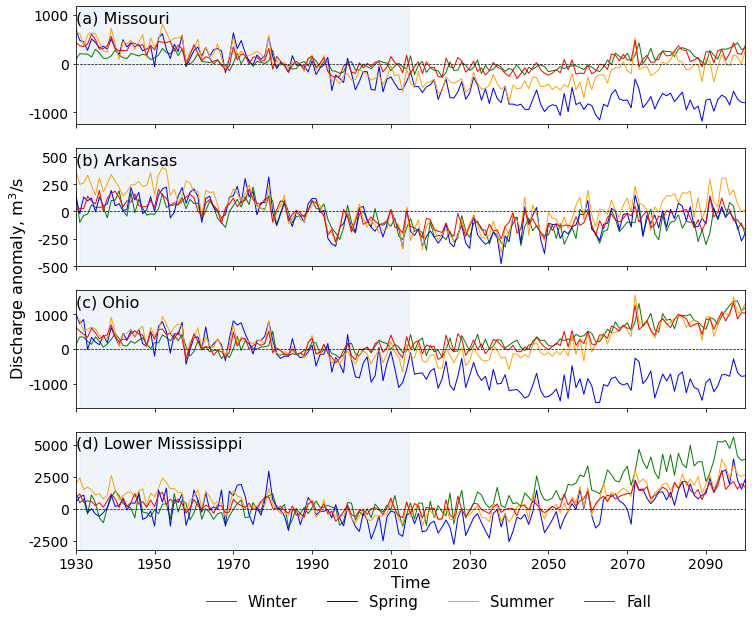

In [47]:
#%matplotlib notebook

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16

linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(12, 10), constrained_layout=False)
axs = [plt.subplot(4, 1, x + 1,) for x in range(4)]

ax1 = axs[0]

ln12=ax1.plot(range(171), disch_winterAnom_missouriHermann, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln13=ax1.plot(range(171), disch_springAnom_missouriHermann, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln14=ax1.plot(range(171), disch_summerAnom_missouriHermann, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln15=ax1.plot(range(171), disch_fallAnom_missouriHermann, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln16=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ln17=ax1.axvspan(1, 84.5, color='C0',alpha=0.075)
ax1.set_title('(a) Missouri', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
#++++++++++++++++++++++++++

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels('', )

ax1.set_xlim([0, 170])
ax1.set_ylim([-1250, 1180])

ax1.set_yticks([-1000, 0, 1000]) 
ax1.set_yticklabels(['-1000', '0', '1000'],  fontsize = tickFontSize) 
#+++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln22=ax2.plot(range(171), disch_winterAnom_arkansasMurrayLittleRock, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln23=ax2.plot(range(171), disch_springAnom_arkansasMurrayLittleRock, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln24=ax2.plot(range(171), disch_summerAnom_arkansasMurrayLittleRock, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln25=ax2.plot(range(171), disch_fallAnom_arkansasMurrayLittleRock, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln26=ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln27=ax2.axvspan(1, 84.5, color='C0',alpha=0.075)

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_xticks(timeTicks)
ax2.set_xticklabels('', )

ax2.set_xlim([0, 170])
ax2.set_ylim([-500, 580])

ax2.set_yticks([-500, -250, 0, 250, 500]) 
ax2.set_yticklabels(['-500', '-250', '0', '250', '500'],  fontsize = tickFontSize) 

ax2.set_ylabel('Discharge anomaly, $\mathregular{m^{3}}$/s', fontsize = textFontSize )

ax2.yaxis.set_label_coords(-.07, -.1)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ln32=ax3.plot(range(171), disch_winterAnom_ohioOlmsted, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln33=ax3.plot(range(171), disch_springAnom_ohioOlmsted, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln34=ax3.plot(range(171), disch_summerAnom_ohioOlmsted, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln35=ax3.plot(range(171), disch_fallAnom_ohioOlmsted, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln36=ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln37=ax3.axvspan(1, 84.5, color='C0',alpha=0.075)

ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax3.set_xticks(timeTicks)
ax3.set_xticklabels('', )

ax3.set_xlim([0, 170])
ax3.set_yticks([-1000, 0, 1000]) 
ax3.set_yticklabels(['-1000', '0', '1000'],  fontsize = tickFontSize) 
ax3.legend(ncol=4, loc=(+0.185, -1.75),frameon=False, fontsize=legendFontSize)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
ln42=ax4.plot(range(171), disch_winterAnom_missiVicks, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln43=ax4.plot(range(171), disch_springAnom_missiVicks, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln44=ax4.plot(range(171), disch_summerAnom_missiVicks, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln45=ax4.plot(range(171), disch_fallAnom_missiVicks, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln46=ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln47=ax4.axvspan(1, 84.5, color='C0',alpha=0.075)

ax4.set_title('(d) Lower Mississippi', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax4.set_xticks(timeTicks)

ax4.set_xticklabels(timeTickLebels, minor=False, rotation=0, fontsize=tickFontSize)
ax4.set_xlim([0, 170])
ax4.set_yticks([-2500, 0, 2500, 5000]) 
ax4.set_yticklabels(['-2500', '0', '2500', '5000'],  fontsize = tickFontSize) 

ax4.set_xlabel('Time', fontsize = textFontSize)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\seasonal\dischSeasonalAnnualAnom.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\seasonal\dischSeasonalAnnualAnom.png', dpi=600)  


plt.show()


In [48]:
STOP here =========================

SyntaxError: invalid syntax (<ipython-input-48-f1b9be935802>, line 1)